In [1]:
# Observable Trends
# 1:This service is used much more in Urban neighborhoods over Suburban and Rural
# 2:Rural neightborhoods appear to drive to farthur destinations
# 3:Suburban drivers appear to be making more money per driver than drivers in other neighborhoods

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load in csv
city_data = pd.read_csv("raw_data/city_data.csv")
# Load in csv
ride_data = pd.read_csv("raw_data/ride_data.csv")
#Merging data together
merge_data_df = pd.merge(ride_data, city_data,how='outer', on='city' )

In [4]:
#Average Fair per City $ URBAN
#Pulling only Urban city types in to calculate averages
urban = merge_data_df[merge_data_df['type'].str.match('Urban')]
#grouping by city to be able to do calculations
city_group_fair_u = urban.groupby('city')
#calculating averages by city
fair_avg_u = city_group_fair_u['fare'].mean()

#Average Fair per City $ Suburban
#Pulling only Suburban city types in to calculate averages
suburban = merge_data_df[merge_data_df['type'].str.match('Suburban')]
#suburban
#grouping by city to be able to do calculations
city_group_fair_s = suburban.groupby('city')
#calculating averages by city
fair_avg_s = city_group_fair_s['fare'].mean()

#Average Fair per City $ Rural
#Pulling only Rural city types in to calculate averages
rural = merge_data_df[merge_data_df['type'].str.match('Rural')]
#rural
#grouping by city to be able to do calculations
city_group_fair_r = rural.groupby('city')
#calculating averages by city
fair_avg_r = city_group_fair_r['fare'].mean()

In [5]:
#Total Number of Rides Per City URBAN
#Counting totals records for city type Urban to find the total number of rides per city
city_rides_u = city_group_fair_u['city'].count()

#Total Number of Rides Per City Suburnan
#Counting totals records for city type Suburnan to find the total number of rides per city
city_rides_s = city_group_fair_s['city'].count()

#Total Number of Rides Per City Rural
#Counting totals records for city type Rural to find the total number of rides per city
city_rides_r = city_group_fair_r['city'].count()

In [6]:
#Total Number of Drivers Per City URBAN
#creating data fram that only includes Urban city type
urban_dcount = city_data[city_data['type'].str.match('Urban')]
#group data fram by City to do calculations
d_cnt_u = urban_dcount.groupby('city')
#adds all drives to get the total drivers per city
new_count_u = d_cnt_u['driver_count'].sum()

#Total Number of Drivers Per City Suburban
#creating data fram that only includes Suburban city type
suburban_count = city_data[city_data['type'].str.match('Suburban')]
#suburban_count
#group data fram by City to do calculations
d_cnt_s = suburban_count.groupby('city')
#adds all drives to get the total drivers per city
new_count_s = d_cnt_s['driver_count'].sum()
#Print out for review
new_count_s.head()

#Total Number of Drivers Per City Suburban
#creating data fram that only includes Suburban city type
rural_count = city_data[city_data['type'].str.match('Rural')]
#group data fram by City to do calculations
d_cnt_r = rural_count.groupby('city')
#adds all drives to get the total drivers per city
new_count_r = d_cnt_r['driver_count'].sum()

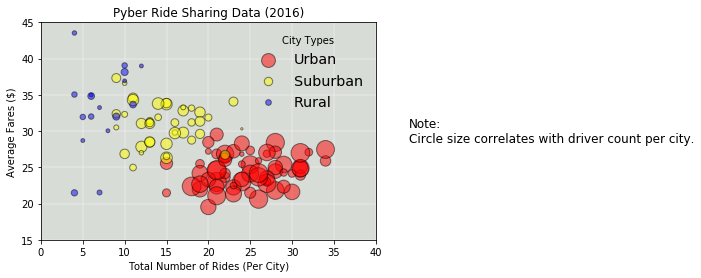

In [7]:
# use the scatter function
#Create a plot to build upon
fig, ax = plt.subplots()
#add urban data to plot
for color in ['red']:
    l = 'Urban'
    x = city_rides_u
    y = fair_avg_u
    z = new_count_u
    ax.scatter(x, y, c=color, s=z*5, alpha=0.5, label=l, edgecolors='black')
#add suburban data to plot
for color in ['yellow']:
    l = 'Suburban'
    x = city_rides_s
    y = fair_avg_s
    z = new_count_s
    ax.scatter(x, y, c=color, s=z*5, alpha=0.5, label=l, edgecolors='black')
#add rural data to plot
for color in ['blue']:
    l = 'Rural'
    x = city_rides_r
    y = fair_avg_r
    z = new_count_r
    ax.scatter(x, y, c=color, s=z*5, alpha=0.5, label=l, edgecolors='black')

#create legend and set location, size, and title
legend = ax.legend(loc='upper right', fontsize='x-large', title="City Types") 
#Change the legend backround transparency to 100% transparency
legend.get_frame().set_alpha(0)
#ax.legend('rural','subuirban')

# set X limits of plot from 0 to 40
plt.xlim(0, 40)

# set y limits of plot from 15 to 45
plt.ylim(15, 45)

#adding a title
plt.title("Pyber Ride Sharing Data (2016)")
#Adding x and y labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
#setting properties of gridlines for color, transparency, linestyles and width
ax.grid(color='w', alpha=.2, linestyle='-', linewidth=2)
#setting background color of plot
ax.set_facecolor('xkcd:light grey')
#pushing the gridlines behind the plotted points
ax.set_axisbelow(True)

#Adding note to the right of the plot
left, width = .6, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax.text(right, 0.5*(bottom+top), 'Note:'+ "\n" + "Circle size correlates with driver count per city.",
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=12,
        transform=ax.transAxes)

plt.show()
#review legends pyplot legend legend handles


Text(0.5,1,'% of Total Fares by City Type')

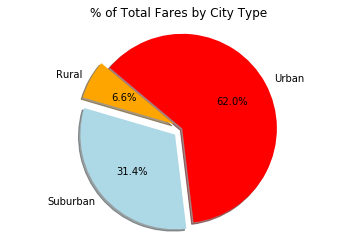

In [8]:
# % of total fares by city type
#grouping data by type to perform calculations
piy_grp = merge_data_df.groupby('type')
#piy_grp
#calculating fare totals
c_type_total = piy_grp['fare'].sum()
#setting labels of pie chart
labels = ["Rural" ,"Suburban","Urban"]
#setting colores of pie chart
colors = ['orange','lightblue','red']
#setting explode values
explode = (0.1,0.1,0)
#creating pie chart and formating
plt.pie(c_type_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
#getting the plot to view properly
plt.axis("equal")
#reviewing plot
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Rides by City Type')

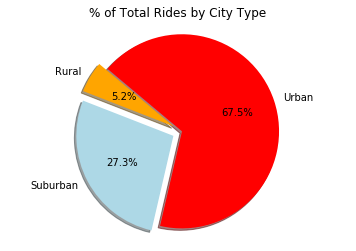

In [9]:
# % of Total Rides by City Type
#grouping data by type to perform calculations
piy_grp = merge_data_df.groupby('type')
#calculating ride totals
ride_total = piy_grp['city'].count()
#setting labels of pie chart
labels = ["Rural" ,"Suburban","Urban"]
#setting colores of pie chart
colors = ['orange','lightblue','red']
#setting explode values
explode = (0.1,0.1,0)
#creating pie chart and formating
plt.pie(ride_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
#getting the plot to view properly
plt.axis("equal")
#reviewing plot
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

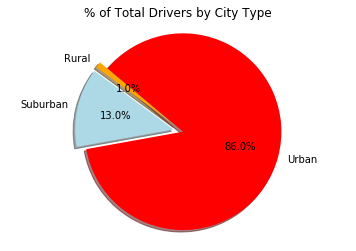

In [10]:
# % of Total Drivers by City Type
#grouping data by type to perform calculations
piy_grp3 = merge_data_df.groupby('type')
#calculating ride totals
pie_d_count = piy_grp3['driver_count'].sum()
#setting labels of pie chart
labels = ["Rural" ,"Suburban","Urban"]
#pie_d_count = pie_d_count
#setting colores of pie chart
colors = ['orange','lightblue','red']
#setting explode values
explode = (0.1,0.1,0)
#creating pie chart and formating
plt.pie(pie_d_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
#getting the plot to view properly
plt.axis("equal")
#reviewing plot
plt.title("% of Total Drivers by City Type")